# **About this file**

Password - 670k unique values for password collected online

Strength - three values(0 , 1 , 2) i.e. 0 for weak, 1 for medium, 2 for strong.

Strength of the password based on rules(such as containing digits, special symbols , etc.)

Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Importing Dataset
data = pd.read_csv('/content/data.csv',error_bad_lines=False)

In [3]:
data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [4]:
data.tail()

,password,strength
669635,10redtux10,1
669636,infrared1,1
669637,184520socram,1
669638,marken22a,1
669639,fxx4pw4g,1


In [5]:
data.shape

(669640, 2)

In [6]:
data['strength'].value_counts()

1    496801
0     89702
2     83137
Name: strength, dtype: int64

Weak Passwords(0) -> 89702

Medium passwords(1) -> 496801

Strong Passwords(2) -> 83137

In [7]:
# Checking for null values
data.isnull().sum()


password    1
strength    0
dtype: int64

In [8]:
# Dropping the null values since the dataset is large
data.dropna(inplace=True)

In [9]:
data.isnull().sum()

password    0
strength    0
dtype: int64

In [10]:
# Mapping 0,1,2 as Weak, Medium and Strong respectively to the strength column of dataset
data["strength"] = data["strength"].map({0: "Weak",
                                         1: "Medium",
                                         2: "Strong"})

In [11]:
print(data.sample(5))

         password strength
169085    azote2h     Weak
620918   edward85   Medium
402186  swimming7   Medium
257465  peruano55   Medium
164661  2februari   Medium


In [ ]:
# Converting words to characters
def word(password):
    character=[]
    for i in password:
        character.append(i)
    return character

x = word(data['password'])
y = word(data['strength'])

# Converting textudal data to numerical data
tdif = TfidfVectorizer(tokenizer=word)
x = tdif.fit_transform(x)

# Split Data into Training Data and Testing data
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size=0.05,
                                                random_state=42)

# Training Data

1. Using RandomForest Classifier




In [14]:
model = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
model.fit(xtrain, ytrain)

#accuracy on training data
X_train_prediction = model.predict(xtrain)
training_data_accuracy = accuracy_score(X_train_prediction, ytrain)
print(f'\nTraining data accuracy : {round(100*training_data_accuracy,2)}%')


#accuracy on testing data
X_test_prediction = model.predict(xtest)
testing_data_accuracy = accuracy_score(X_test_prediction, ytest)
print(f'\nTesting data accuracy : {round(100*testing_data_accuracy,2)}%')


Training data accuracy : 99.65%

Testing data accuracy : 93.91%


2. Using Logistic Regression

In [15]:
log = LogisticRegression( max_iter=1000)
log.fit(xtrain, ytrain)

#accuracy on training data
xtrain_prediction = log.predict(xtrain)
training_data_accuracy = accuracy_score(xtrain_prediction, ytrain)
print(f'\nTraining data accuracy : {round(100*training_data_accuracy,2)}%')


#accuracy on testing data
xtest_prediction = log.predict(xtest)
testing_data_accuracy = accuracy_score(xtest_prediction, ytest)
print(f'\nTesting data accuracy : {round(100*testing_data_accuracy,2)}%')


Training data accuracy : 81.93%

Testing data accuracy : 82.12%


# User Input

In [16]:
import getpass
user = getpass.getpass("Enter Password: ")
data = tdif.transform([user]).toarray()
output1 = model.predict(data) #using RandomForest
output2 = log.predict(data) #using Logistic Regression
print(output1)
print(output2)

Enter Password: ··········
['Strong']
['Strong']


# Confusion Matrix

We can see that accuracy achieved using Random Forest Classifier is way better than Logistic Regression, hence we summarize the performance of the above model by plotting the Confusion Matrix


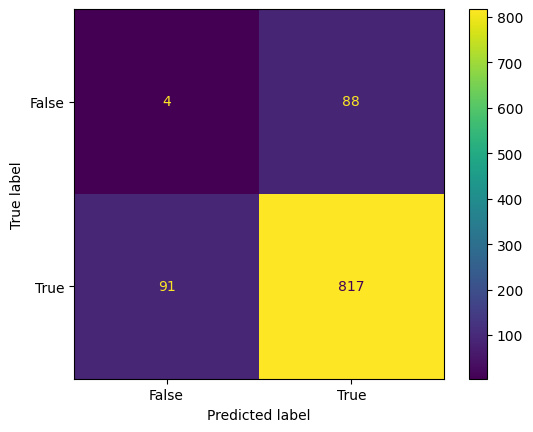

In [27]:

#Creating the Confusion matrix  for RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(X_test_prediction,ytest)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

As we can see in the above matrix, there are **88 + 91 = 179 incorrect predictions** and **4 + 817 = 821 correct predictions** out of **1000** samples
